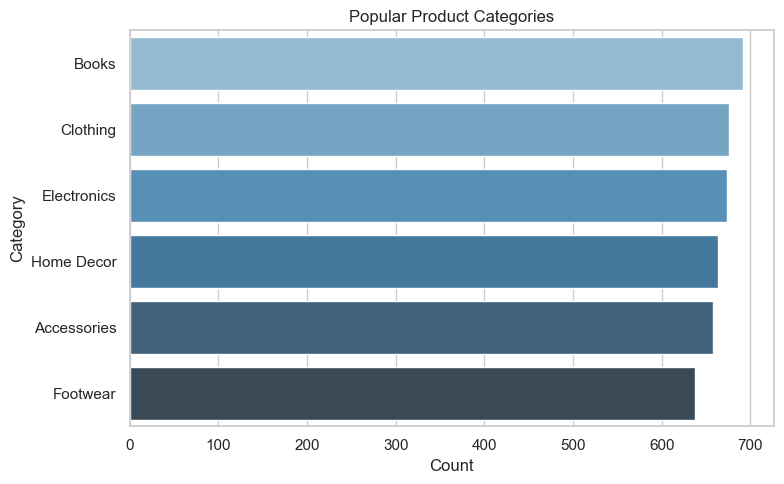

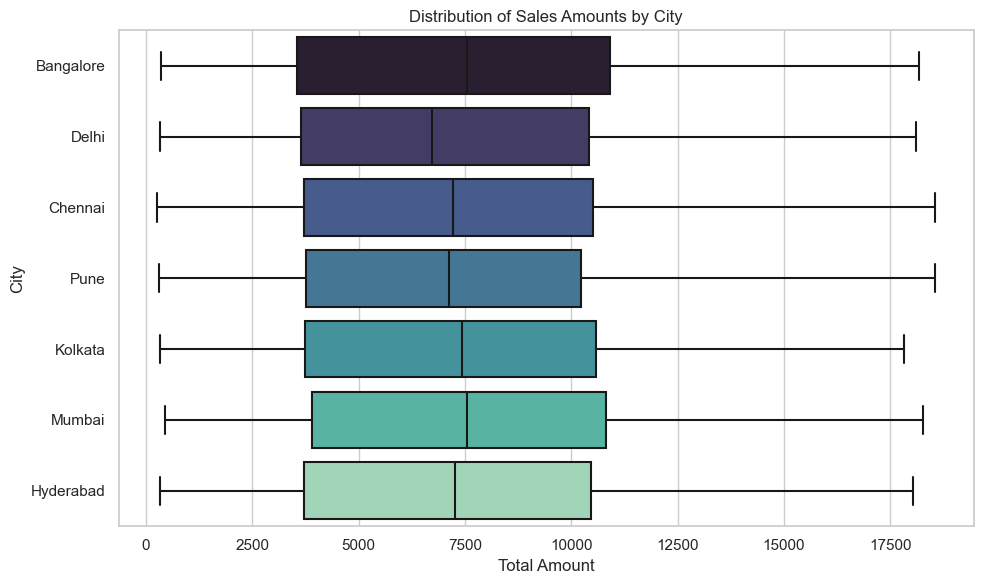

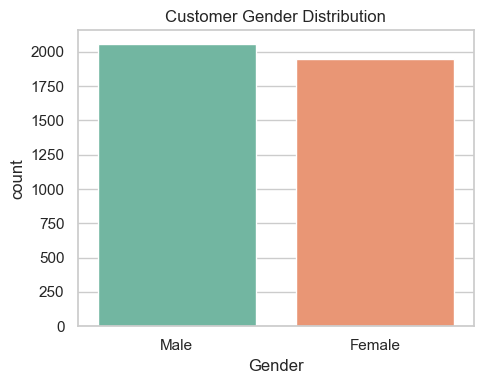

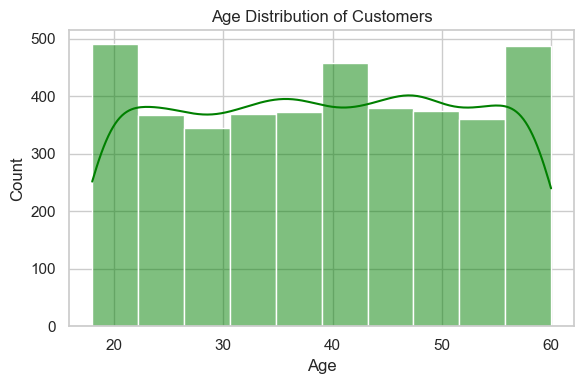

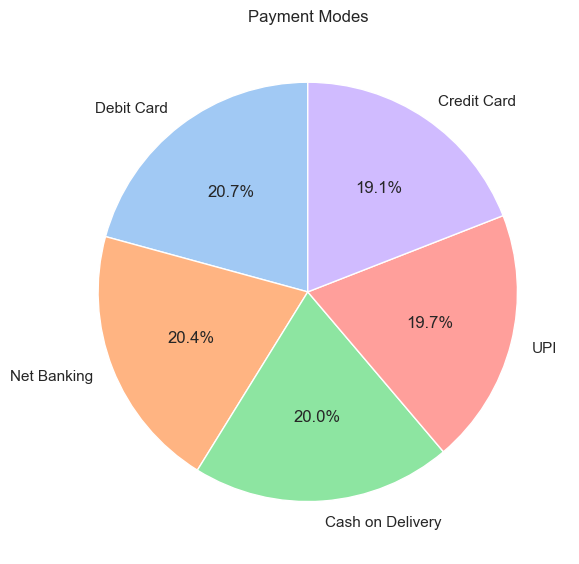

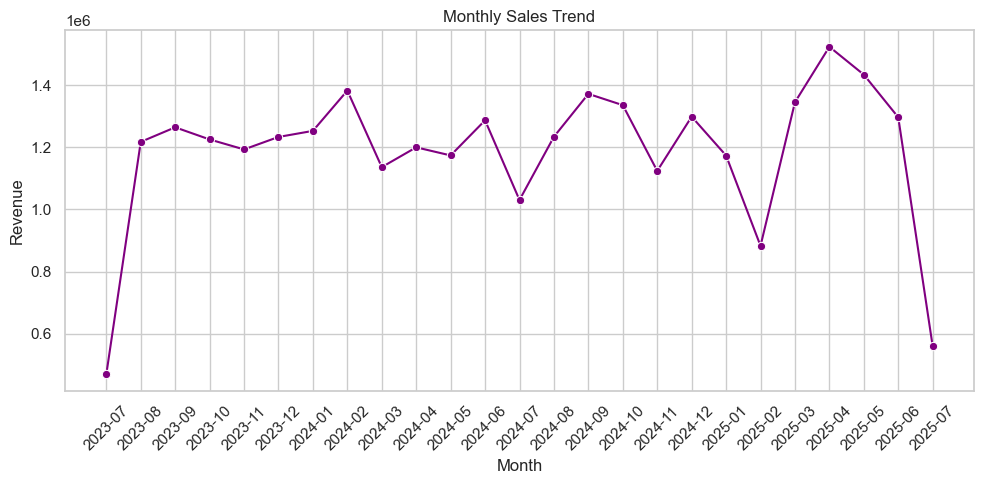

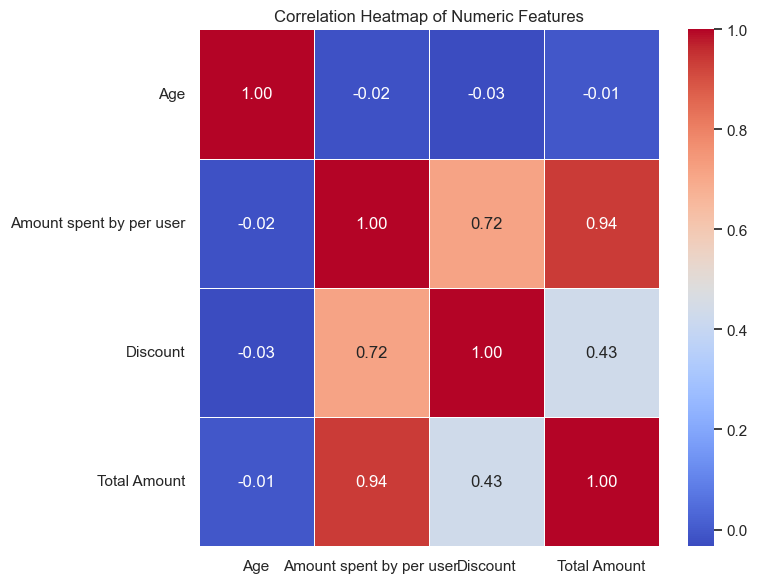

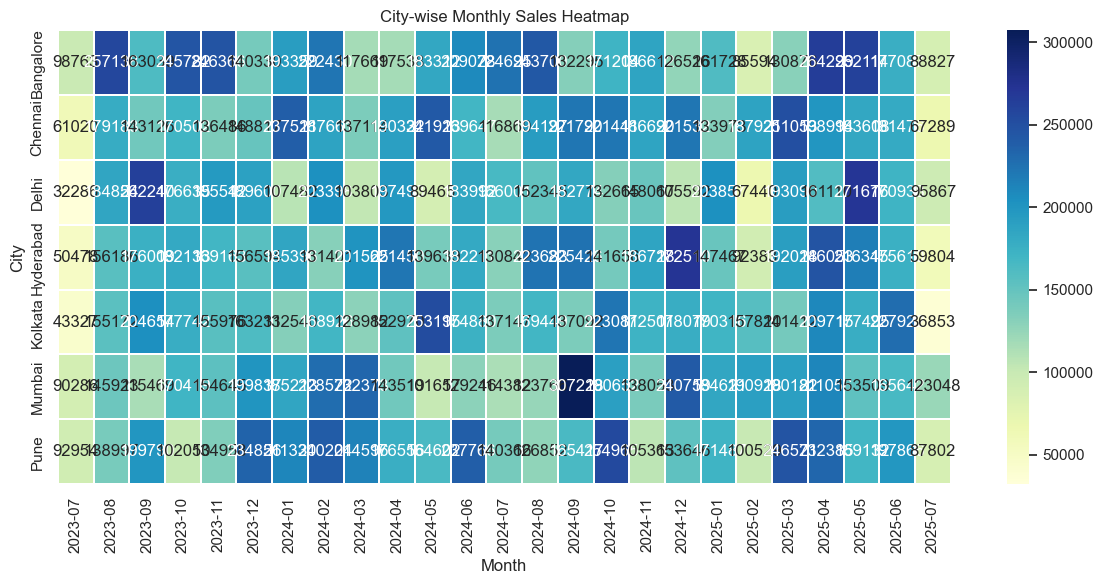

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for consistency
sns.set_theme(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("cleaned_online_shopping_data.csv")

# Ensure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 1. Product Category Count using Seaborn
plt.figure(figsize=(8, 5))
category_order = df['Product Category'].value_counts().index
sns.countplot(data=df, y='Product Category', order=category_order, palette='Blues_d')
plt.title("Popular Product Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# 2. City-wise Total Sales using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total Amount', y='City', palette='mako')
plt.title("Distribution of Sales Amounts by City")
plt.xlabel("Total Amount")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# 3. Gender Distribution using Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Customer Gender Distribution")
plt.tight_layout()
plt.show()

# 4. Age Distribution using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='green')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

# 5. Payment Mode Pie Chart (No seaborn equivalent, so using matplotlib)
plt.figure(figsize=(6, 6))
df['Payment mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Modes")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 6. Monthly Sales Trend using Seaborn
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Correlation Heatmap of Numeric Features
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # select only numeric columns
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

